In [1]:
pip install pandas numpy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
python.exe -m pip install --upgrade pip

SyntaxError: invalid syntax (842801469.py, line 1)

In [3]:
pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.5/1.8 MB 3.2 MB/s eta 0:00:01
   ----------------------- ---------------- 1.0/1.8 MB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 3.4 MB/s  0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 25.2
    Uninstalling pip-25.2:
      Successfully uninstalled pip-25.2
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np

# For reproducibility
np.random.seed(42)

# -----------------------
# 1. Core structure
# -----------------------
n = 600  # rows of data

dates = pd.date_range("2024-01-01", periods=120)
categories = ["Electronics", "Fashion", "Home", "Beauty"]
regions = ["North", "South", "East", "West"]

# Randomly pick values
df = pd.DataFrame({
    "date": np.random.choice(dates, n),
    "category": np.random.choice(categories, n),
    "region": np.random.choice(regions, n),
    "units_sold": np.random.randint(10, 200, n),
    "avg_price": np.random.randint(20, 300, n).astype(float),
    "ad_spend": np.random.randint(100, 800, n).astype(float)
})

# -----------------------
# 2. Create target variable
# -----------------------
df["revenue"] = (df["units_sold"] * df["avg_price"]).round(2)

# -----------------------
# 3. Inject realistic imperfections
# -----------------------

# (a) Introduce 8% missing values in ad_spend
mask = np.random.rand(n) < 0.08
df.loc[mask, "ad_spend"] = np.nan

# (b) Mild outliers: randomly pick 4 rows and triple ad_spend
outlier_idx = np.random.choice(df.index, 4, replace=False)
df.loc[outlier_idx, "ad_spend"] *= 3

# (c) Slight noise in avg_price
df["avg_price"] = (df["avg_price"] + np.random.normal(0, 10, n)).clip(10, 350)

# -----------------------
# 4. Shuffle and save
# -----------------------
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.to_csv("ecommerce_sales_data.csv", index=False)

print("✅ Dataset created with shape:", df.shape)
print(df.head())


✅ Dataset created with shape: (600, 7)
        date     category region  units_sold   avg_price  ad_spend  revenue
0 2024-03-20      Fashion  South          89   19.127971     646.0   2136.0
1 2024-01-27      Fashion   West         125   86.196100     383.0  10250.0
2 2024-01-19  Electronics  South         141  114.379155     555.0  14805.0
3 2024-02-16         Home  South         118  142.730197     282.0  14986.0
4 2024-02-11  Electronics   West         169  154.868036       NaN  27040.0


In [2]:
df = pd.read_csv("ecommerce_sales_data.csv")
print(df.info())          # datatypes, nulls
print(df.describe())      # numeric summary
print(df.isna().sum())    # missing-value counts
print(df['category'].value_counts())  # category balance

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        600 non-null    object 
 1   category    600 non-null    object 
 2   region      600 non-null    object 
 3   units_sold  600 non-null    int64  
 4   avg_price   600 non-null    float64
 5   ad_spend    538 non-null    float64
 6   revenue     600 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 32.9+ KB
None
       units_sold   avg_price     ad_spend       revenue
count  600.000000  600.000000   538.000000    600.000000
mean   101.445000  160.814621   479.637546  16780.365000
std     56.043004   80.820207   222.966851  13511.610162
min     10.000000   10.000000   100.000000    286.000000
25%     50.000000   94.597243   298.500000   5769.750000
50%    100.500000  159.081227   484.000000  13071.000000
75%    152.000000  230.309712   660.750000  24675.750000
max

Correlation ad_spend ↔ revenue: -0.067
category
Beauty         17451.592857
Home           17143.757353
Electronics    16670.463277
Fashion        15937.231293
Name: revenue, dtype: float64


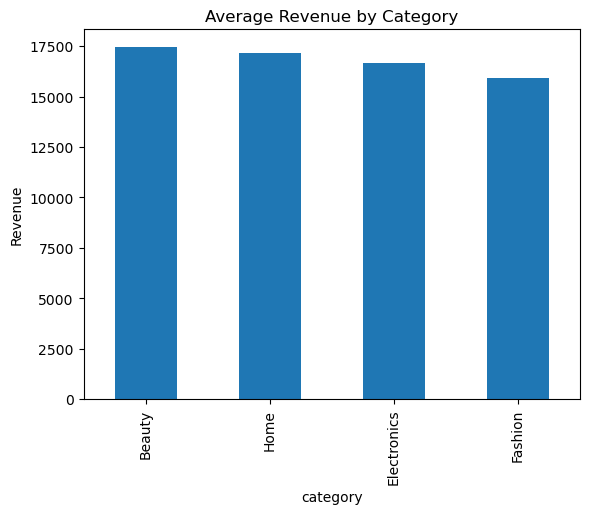

In [3]:
import matplotlib.pyplot as plt

# 1. Correlation between ad_spend and revenue
corr = df[['ad_spend','revenue']].corr().iloc[0,1]
print("Correlation ad_spend ↔ revenue:", round(corr,3))

# 2. Average revenue by category
avg_rev = df.groupby('category')['revenue'].mean().sort_values(ascending=False)
print(avg_rev)

# 3. Quick visualization
avg_rev.plot(kind='bar', title='Average Revenue by Category')
plt.ylabel('Revenue')
plt.show() 